<a href="https://colab.research.google.com/github/Mochismo/LearnPython/blob/main/Fifteenth_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
# Problem 1
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd_train = pd.read_csv('/content/drive/MyDrive/train.csv', index_col= 'Id')
df = pd_train[["GrLivArea","YearBuilt", "SalePrice"]]

# Visualizing few rows and columns of our dataset after selecting key variables to work with
df.head()

,GrLivArea,YearBuilt,SalePrice
Id,,,
1,1710,2003,208500
2,1262,1976,181500
3,1786,2001,223500
4,1717,1915,140000
5,2198,2000,250000


In [168]:
t = df.info(verbose=True) # information of all colums
#print(t)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 45.6 KB


In [169]:
df.describe

<bound method NDFrame.describe of       GrLivArea  YearBuilt  SalePrice
Id                                   
1          1710       2003     208500
2          1262       1976     181500
3          1786       2001     223500
4          1717       1915     140000
5          2198       2000     250000
...         ...        ...        ...
1456       1647       1999     175000
1457       2073       1978     210000
1458       2340       1941     266500
1459       1078       1950     142125
1460       1256       1965     147500

[1460 rows x 3 columns]>

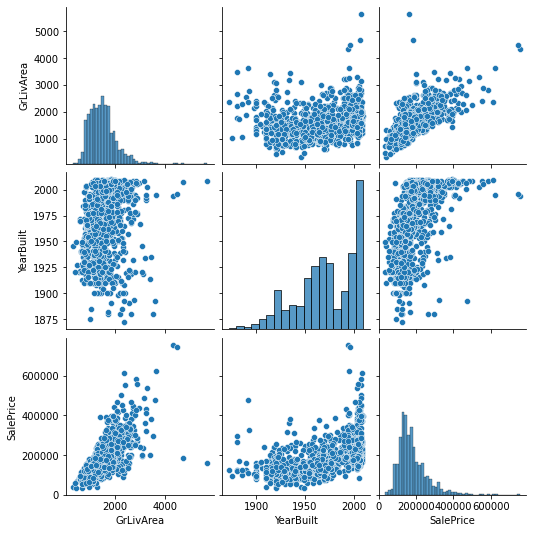

In [170]:
sns.pairplot(df)
plt.show()

In [171]:
X = df.loc[:,['GrLivArea','YearBuilt']]
y = df.loc[:,'SalePrice']

In [172]:
X.head

<bound method NDFrame.head of       GrLivArea  YearBuilt
Id                        
1          1710       2003
2          1262       1976
3          1786       2001
4          1717       1915
5          2198       2000
...         ...        ...
1456       1647       1999
1457       2073       1978
1458       2340       1941
1459       1078       1950
1460       1256       1965

[1460 rows x 2 columns]>

In [173]:
X.shape, y.shape

((1460, 2), (1460,))

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1095, 2), (365, 2), (1095,), (365,))

In [175]:
# Pretreatment/ Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [176]:
# Learning and Estimation
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_preds = reg.predict(X_test)

In [177]:
# Estimation
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)
print("MSE Linear Regression: {:,.3f}".format(mse))

MSE Linear Regression: 2,314,465,092.732


In [178]:
reg.score(X_test, y_test)

0.6696127072424974

In [179]:
from sklearn.metrics import r2_score
print(f'R^2(coefficient of determination) Linear Regression: {r2_score(y_test, y_preds)}')

R^2(coefficient of determination) Linear Regression: 0.6696127072424974


In [180]:
# Visualization
def visualization(y_preds, title):
  fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2, figsize=(12,5))
  ax1.scatter(X_test[:,0], y_test)
  ax1.scatter(X_test[:,0], y_preds, c='red')
  classes = ["actual","predicted"]
  ax1.legend(labels=classes)
  ax1.set(title="Scatterplot of house price based on GrLivArea", xlabel="GrLiArea", ylabel = "house price")

  ax2.scatter(X_test[:,1], y_test)
  ax2.scatter(X_test[:,1], y_preds, c='red')
  ax2.legend(labels=classes)
  ax2.set(title="Scatterplot of house price based on year built", xlabel="Year built", ylabel = "House Price")

  fig.suptitle(title, fontsize=16, fontweight= 'bold');



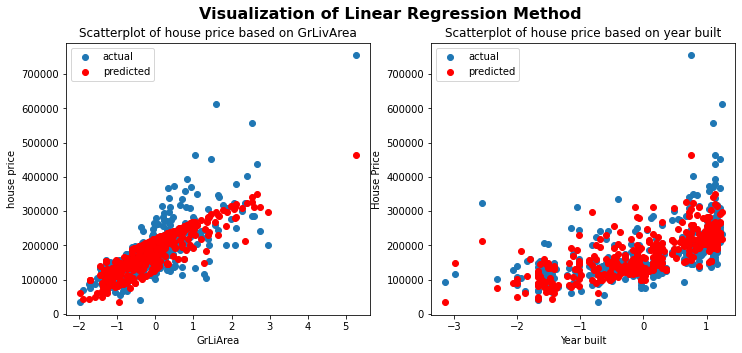

In [181]:
visualization(y_preds, "Visualization of Linear Regression Method")

In [182]:
#Comparison of Methods
# SVM(Support vector Machine)
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_train, y_train)
y_preds_svr = svr_reg.predict(X_test)

In [183]:
mse_svr = mean_squared_error(y_test, y_preds_svr)
print("MSE SVR: {:,.3f}".format(mse_svr))

MSE SVR: 7,169,223,057.830


In [184]:
print(f'R^2 score SVM: {r2_score(y_test, y_preds_svr)}')

R^2 score SVM: -0.023398540202243634


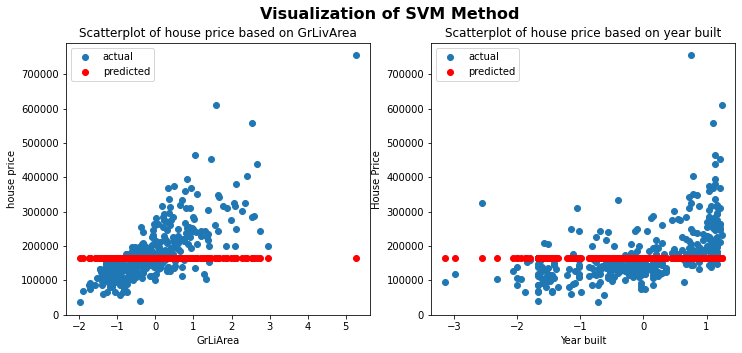

In [185]:
visualization(y_preds_svr, "Visualization of SVM Method")

In [186]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_preds_rf = rf_reg.predict(X_test)

In [187]:
mse_rf = mean_squared_error(y_test, y_preds_rf)
print("MSE Random Forest: {:,.3f}".format(mse_rf))

MSE Random Forest: 1,654,240,058.846


In [188]:
print(f'R^2 score Random Forest: {r2_score(y_test, y_preds_rf)}')

R^2 score Random Forest: 0.7638590893725652


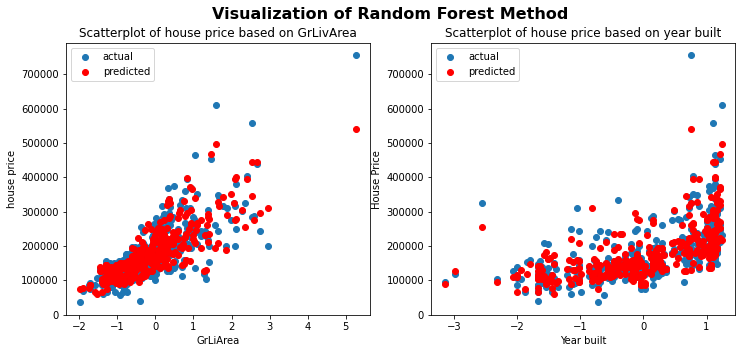

In [189]:
visualization(y_preds_rf, "Visualization of Random Forest Method")

In [190]:
# Common imports
import numpy as np
import os
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_preds_dt = dt_reg.predict(X_test)

In [191]:
mse_dt = mean_squared_error(y_test, y_preds_dt)
print("MSE Decision Tree: {:,.3f}".format(mse_dt))

MSE Decision Tree: 2,400,782,038.354


In [192]:
print(f'R^2 score Decision Tree: {r2_score(y_test, y_preds_dt)}')

R^2 score Decision Tree: 0.6572910601920257


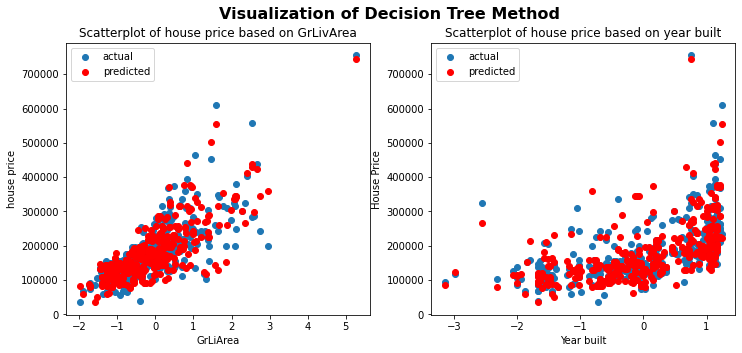

In [193]:
visualization(y_preds_dt, "Visualization of Decision Tree Method")

| Model              	| Linear Regression  	| SVM                   	| Decision Tree      	| Random Forest      	|
|--------------------	|--------------------	|-----------------------	|--------------------	|--------------------	|
| mean_squared_error 	| 2,314,465,092.732  	| 7,169,223,057.830     	| 1,679,070,718.252  	| 2,398,700,877.894  	|
| r2_score           	| 0.6696127072424974 	| -0.023398540202243634 	| 0.7603145406280909 	| 0.6575881435105095 	|

In [194]:
# Problem 4 
#Learning Using Other Features
pd_train.corr()['SalePrice'].sort_values(ascending=False).to_frame().head(10)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [195]:
df2 = pd_train.loc[:,['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageCars', 'GarageArea', 'SalePrice']]
df2.head

<bound method NDFrame.head of       GrLivArea  OverallQual  YearBuilt  GarageCars  GarageArea  SalePrice
Id                                                                        
1          1710            7       2003           2         548     208500
2          1262            6       1976           2         460     181500
3          1786            7       2001           2         608     223500
4          1717            7       1915           3         642     140000
5          2198            8       2000           3         836     250000
...         ...          ...        ...         ...         ...        ...
1456       1647            6       1999           2         460     175000
1457       2073            6       1978           2         500     210000
1458       2340            7       1941           1         252     266500
1459       1078            5       1950           1         240     142125
1460       1256            5       1965           1         276     14

In [196]:
X2 = df2.loc[:,['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageCars', 'GarageArea', 'SalePrice']]
y2 = df2.loc[:,'SalePrice']

In [197]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((1095, 6), (365, 6), (1095,), (365,))

In [198]:
scaler = StandardScaler()
scaler.fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

In [202]:
def Regression_Models(X_train, X_test, y_train, y_test, features_list):
  # prediction by 4methods
  method_list = ["LinearRegression", "SVR", "DecisionTreeRegressor", "RandomForestRegressor"]
  lr = LinearRegression().fit(X_train, y_train).predict(X_test)
  svr = SVR().fit(X_train, y_train).predict(X_test)
  dt = DecisionTreeRegressor().fit(X_train, y_train).predict(X_test)
  rf = RandomForestRegressor().fit(X_train, y_train).predict(X_test)
  y_pred_list = [lr, svr, dt,rf]
  # Calculate mse and summarise it in a table
  mse_list = [mean_squared_error(y_test,lr), mean_squared_error(y_test,svr),mean_squared_error(y_test,dt),mean_squared_error(y_test,rf)]
  df_mse.loc['MSE with 5 features'] = mse_list
  display(df_mse)
  # Display scatter plot y-axis being for the target variable and x-axis for the features
  for method, y_pred in zip(method_list, y_pred_list):
    fig, axes = plt.subplots(1, len(features_list), figsize=(6*len(features_list), 5), sharey=True)
    fig.suptitle(method, fontweight="bold", size=20)
    for i in range (len(features_list)):
      axes[i].scatter(X_test[:, i], y_test, ccolor='blue',label='test data')
      axes[i].scatter(X_test[:, i], y_pred, ccolor='red',label='pred data')
      axes[i].set_title(features_list[i])
      axes[i].set_ylable('SalePrice')
      axes[i].legend()
    plt.show()  

In [203]:
df_mse = pd.DataFrame(columns=method_list+['mean_squared_error']).set_index('mean_squared_error')

NameError: ignored

In [ ]:
features_list =['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageCars', 'GarageArea', 'SalePrice'] 

In [ ]:




Regression_Models(X2_train, X2_test, y2_train, y2_test, features_list)